In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
ROOT = "."
FIGURES_FOLDER = ROOT + "/Figures"
SIM_FOLDER = ROOT + "/Simulations"

Mounted at /content/drive/


#2D Random Walk

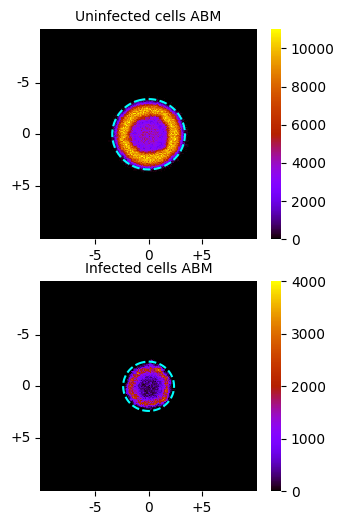

In [ ]:
def G(rho, p, P):
  return p*(1-rho/P)

# 2D delta^2 / (4*tau) -> D for delta, tau -> 0
# 1D delta^2 / (2*tau) -> D for delta, tau -> 0
# Du = theta_u * D
# Di = theta_i * D

random_2d_sims = [2, 3, 4]

delta = 0.1 # mm
tau = 0.2 # h
D = delta**2/(4*tau)
Du = Di = 1.88e-4 # mm^2/h
theta_u = Du/D
theta_i = Di/D
beta = 1.02e-1 # h-1
p	= 1.87e-2 # h-1
q	= 4.17e-2 # h-1
P = K	= 1e4 # 1/mm^2
c_max = int(K*delta*delta)
Ru = 2.6 # mm
Ri = 1 # mm
pop_unit = 2

# define functions and parameters to save and plot results
def Circle(x, y, center):
  return (x-center)**2+(y-center)**2

size = int(1/delta * 10 * 2)
xx = np.linspace(0, size, size)
yy = np.linspace(0, size, size)
X, Y = np.meshgrid(xx,yy)
Z = Circle(X, Y, size//2)
ticks = [size//2 - 5//delta, size//2, size//2 + 5//delta]


def calc_average2D(simulation_numbers, hour):
  sims_len = float(len(simulation_numbers))
  average = np.load(f"{SIM_FOLDER}/sim{simulation_numbers[0]}/sim{simulation_numbers[0]}_h{hour}.npy").astype('float64')/sims_len
  for sim_n in simulation_numbers[1:]:
    next_sim = np.load(f"{SIM_FOLDER}/sim{sim_n}/sim{sim_n}_h{hour}.npy").astype('float64')
    average += next_sim/sims_len
  return average

def get_pde_2d(hour):
  pde = np.load(f"{SIM_FOLDER}/results/pde_random_2d_h{hour}.npy")
  return pde

def plot_result2D(domain, pde, h):
  radius_u = (Ru + h*2*np.sqrt(Du*p))/delta
  radius_i = (Ri + h*2*np.sqrt(Di*(beta-q)))/delta
  plt.figure(figsize=(3.5, 6))

  # plot U
  # plt.subplot(2, 2, 1)
  plt.subplot(2, 1, 1)
  ax1 = sns.heatmap(np.divide(domain[0],delta**2),vmin=0,vmax=K*1.1,cmap="gnuplot")
  ax1.set_xticks(ticks)
  ax1.set_xticklabels(["-5","0","+5"],rotation=0)
  ax1.set_yticks(ticks)
  ax1.set_yticklabels(["-5","0","+5"],rotation=0)
  ax1.title.set_text(f"Uninfected cells ABM")
  ax1.title.set_fontsize(10)
  ax1.contour(X,Y,Z,[radius_u**2],colors=["cyan"],linestyles=["dashed"])

  # plot I
  # plt.subplot(2, 2, 3)
  plt.subplot(2, 1, 2)
  ax2 = sns.heatmap(np.divide(domain[1],delta**2),vmin=0,vmax=K*.4,cmap="gnuplot")
  ax2.set_xticks(ticks)
  ax2.set_xticklabels(["-5","0","+5"],rotation=0)
  ax2.set_yticks(ticks)
  ax2.set_yticklabels(["-5","0","+5"],rotation=0)
  ax2.title.set_text(f"Infected cells ABM")
  ax2.title.set_fontsize(10)
  ax2.contour(X,Y,Z,[radius_i**2],colors=["cyan"],linestyles=["dashed"])


  # # PDE
  # # plot U
  # plt.subplot(2, 2, 2)
  # ax3 = sns.heatmap(pde[0],vmin=0,vmax=K*1.1,cmap="gnuplot")
  # ax3.set_xticks(ticks)
  # ax3.set_xticklabels(["-5","0","+5"],rotation=0)
  # ax3.set_yticks(ticks)
  # ax3.set_yticklabels(["-5","0","+5"],rotation=0)
  # ax3.title.set_text(f"Uninfected cells Cont.")
  # ax3.title.set_fontsize(10)
  # ax3.contour(X,Y,Z,[radius_u**2],colors=["cyan"],linestyles=["dashed"])

  # # plot I
  # plt.subplot(2, 2, 4)
  # ax4 = sns.heatmap(pde[1],vmin=0,vmax=K*.4,cmap="gnuplot")
  # ax4.set_xticks(ticks)
  # ax4.set_xticklabels(["-5","0","+5"],rotation=0)
  # ax4.set_yticks(ticks)
  # ax4.set_yticklabels(["-5","0","+5"],rotation=0)
  # ax4.title.set_text(f"Infected cells Cont.")
  # ax4.title.set_fontsize(10)
  # ax4.contour(X,Y,Z,[radius_i**2],colors=["cyan"],linestyles=["dashed"])

  # save and plot figure
  plt.savefig(f"{FIGURES_FOLDER}/results/results_sims234_h{h}.png", format='png', dpi=200)
  plt.show()

hour = 200
avg = calc_average2D(random_2d_sims, hour)
pde = get_pde_2d(hour)
plot_result2D(avg, pde, hour)

# 1D Random Walk

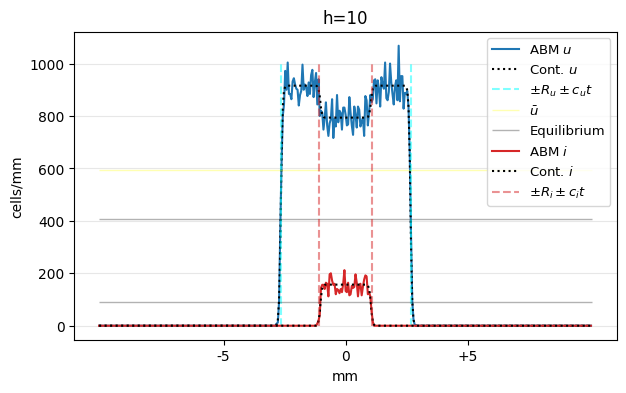

In [ ]:
delta = 0.05 # mm
tau = 0.2 # h
D = delta**2/(2*tau)
Du = Di = 1.88e-4 # mm^2/h
theta_u = Du/D
theta_i = Di/D
beta = 1.02e-1 # h-1
p	= 1.87e-2 # h-1
q	= 4.17e-2 # h-1
P = K	= 1e3 # 1/mm^2
c_max = int(K*delta)
Ru = 2.6 # mm
Ri = 1 # mm


u_eq = q*K/beta
i_eq = (p*K*(beta-q))/(beta*(beta+p))
u_bar = u_eq + (Du*p*K)/(Di*beta)
random_1d_sims = [5, 6, 7, 8, 9]

size = int(1/delta * 10 * 2)
ticks = [size//2 - 5//delta, size//2, size//2 + 5//delta]

def plot_result1D(domain, pde, h):
  radius_u = (Ru + h*2*np.sqrt(Du*p))/delta
  radius_i = (Ri + h*2*np.sqrt(Di*(beta-q)))/delta
  fig, ax = plt.subplots(figsize=(7, 4))

  # plot U
  plt.plot(np.divide(domain[0],delta), color="tab:blue", label=r"ABM $u$")
  plt.plot(pde[0], color="black", linestyle="dotted", label=r"Cont. $u$")
  plt.vlines([size//2 + radius_u, size//2 - radius_u], 0, c_max/delta, colors=["cyan"], linestyles="dashed", alpha=0.5, label=r"$\pm R_u\pm c_u t$")
  plt.hlines([u_bar], 0, size, color="yellow", linewidth=1, alpha=0.3, label=r"$\bar{u}$")
  plt.hlines([u_eq], 0, size, color="black", linewidth=1, alpha=0.3, label="Equilibrium")
  # plot I
  plt.plot(np.divide(domain[1],delta), color="tab:red", label=r"ABM $i$")
  plt.plot(pde[1], color="black", linestyle="dotted", label=r"Cont. $i$")
  plt.vlines([size//2 - radius_i, size//2 + radius_i], 0, c_max/delta, colors=["tab:red"], linestyles="dashed", alpha=0.5, label=r"$\pm R_i\pm c_i t$")
  plt.hlines([i_eq], 0, size, color="black", linewidth=1, alpha=0.3)


  ax.set_xticks(ticks)
  ax.set_xticklabels(["-5","0","+5"],rotation=0)
  ax.title.set_text(f"h={h}")
  ax.yaxis.grid(alpha=0.3)
  plt.xlabel("mm")
  plt.ylabel("cells/mm")
  plt.legend(fontsize=9.5)
  # save and plot figure
  plt.savefig(f"{FIGURES_FOLDER}/results/results_sims56789_h{h}.svg", format='svg', dpi=200)
  plt.show()

def calc_average1D(simulation_numbers, hour):
  sims_len = float(len(simulation_numbers))
  average = np.load(f"{SIM_FOLDER}/sim{simulation_numbers[0]}/sim{simulation_numbers[0]}_h{hour}.npy").astype('float64')/sims_len
  for sim_n in simulation_numbers[1:]:
    next_sim = np.load(f"{SIM_FOLDER}/sim{sim_n}/sim{sim_n}_h{hour}.npy").astype('float64')
    average += next_sim/sims_len
  return average


def get_pde_1d(hour):
  pde = np.load(f"{SIM_FOLDER}/results/pde_random_1d_h{hour}.npy")
  return pde

hour = 10
avg = calc_average1D(random_1d_sims, hour)
pde = get_pde_1d(hour)
plot_result1D(avg, pde, hour)

#1D Pressure Walk

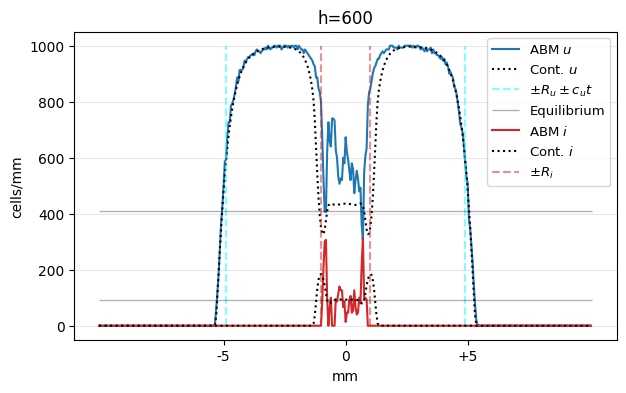

In [12]:
delta = 0.05 # mm
tau = 0.2 # h
D = delta**2/(2*tau)
Du = Di = 1.5e-3 # mm^2/h
theta_u = Du/D
theta_i = Di/D
beta = 1.02e-1 # h-1
p	= 1.87e-2 # h-1
q	= 4.17e-2 # h-1
P = K	= 1e3 # 1/mm^2
c_max = int(K*delta)
Ru = 2.6 # mm
Ri = 1 # mm



u_eq = q*K/beta
i_eq = (p*K*(beta-q))/(beta*(beta+p))
pressure_1d_sims = [10, 11, 12]

size = int(1/delta * 10 * 2)
ticks = [size//2 - 5//delta, size//2, size//2 + 5//delta]

def plot_result_pressure1D(domain, pde, h):
  radius_u = (Ru + h*np.sqrt(Du*p/2))/delta
  radius_i = Ri/delta
  fig, ax = plt.subplots(figsize=(7, 4))

  # plot U
  plt.plot(np.divide(domain[0],delta), color="tab:blue", label=r"ABM $u$")
  plt.plot(pde[0], color="black", linestyle="dotted", label=r"Cont. $u$")
  plt.vlines([size//2 + radius_u, size//2 - radius_u], 0, c_max/delta, colors=["cyan"], linestyles="dashed", alpha=0.5, label=r"$\pm R_u\pm c_u t$")
  plt.hlines([u_eq], 0, size, color="black", linewidth=1, alpha=0.3, label="Equilibrium")
  # plot I
  plt.plot(np.divide(domain[1],delta), color="tab:red", label=r"ABM $i$")
  plt.plot(pde[1], color="black", linestyle="dotted", label=r"Cont. $i$")
  plt.vlines([size//2 - radius_i, size//2 + radius_i], 0, c_max/delta, colors=["tab:red"], linestyles="dashed", alpha=0.5, label=r"$\pm R_i$")
  plt.hlines([i_eq], 0, size, color="black", linewidth=1, alpha=0.3)


  ax.set_xticks(ticks)
  ax.set_xticklabels(["-5","0","+5"],rotation=0)
  ax.title.set_text(f"h={h}")
  ax.yaxis.grid(alpha=0.3)
  plt.xlabel("mm")
  plt.ylabel("cells/mm")
  plt.legend(fontsize=9.5)
  # save and plot figure
  plt.savefig(f"{FIGURES_FOLDER}/results/results_sims101112_h{h}.svg", format='svg', dpi=200)
  plt.show()

def calc_average1D(simulation_numbers, hour):
  sims_len = float(len(simulation_numbers))
  average = np.load(f"{SIM_FOLDER}/sim{simulation_numbers[0]}/sim{simulation_numbers[0]}_h{hour}.npy").astype('float64')/sims_len
  for sim_n in simulation_numbers[1:]:
    next_sim = np.load(f"{SIM_FOLDER}/sim{sim_n}/sim{sim_n}_h{hour}.npy").astype('float64')
    average += next_sim/sims_len
  return average


def get_pde_1d(hour):
  pde = np.load(f"{SIM_FOLDER}/results/pde_pressure_1d_h{hour}.npy")
  return pde

hour = 600
avg = calc_average1D(pressure_1d_sims, hour)
pde = get_pde_1d(hour)
plot_result_pressure1D(avg, pde, hour)

# 2D Pressure Walk

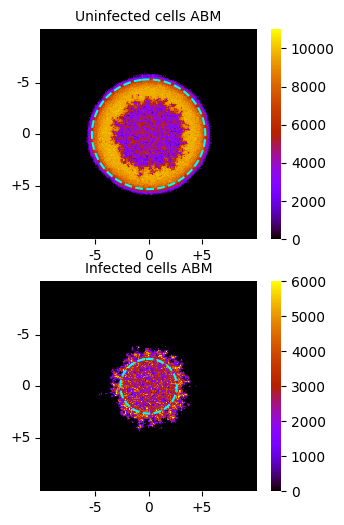

In [ ]:
def G(rho, p, P):
  return p*(1-rho/P)

pressure_2d_sims = [16]

delta = 0.1 # mm
tau = 0.2 # h
D = delta**2/(4*tau)
Du = Di = 1.5e-3 # mm^2/h
theta_u = Du/D
theta_i = Di/D
beta = 1.02e-1 # h-1
p	= 1.87e-2 # h-1
q	= 4.17e-2 # h-1
P = K	= 1e4 # 1/mm^2
c_max = int(K*delta*delta)
Ru = 2.6 # mm
Ri = 1 # mm
pop_unit = 2

# define functions and parameters to save and plot results
def Circle(x, y, center):
  return (x-center)**2+(y-center)**2

size = int(1/delta * 10 * 2)
xx = np.linspace(0, size, size)
yy = np.linspace(0, size, size)
X, Y = np.meshgrid(xx,yy)
Z = Circle(X, Y, size//2)
ticks = [size//2 - 5//delta, size//2, size//2 + 5//delta]


def calc_average2D(simulation_numbers, hour):
  sims_len = float(len(simulation_numbers))
  average = np.load(f"{SIM_FOLDER}/sim{simulation_numbers[0]}/sim{simulation_numbers[0]}_h{hour}.npy").astype('float64')/sims_len
  for sim_n in simulation_numbers[1:]:
    next_sim = np.load(f"{SIM_FOLDER}/sim{sim_n}/sim{sim_n}_h{hour}.npy").astype('float64')
    average += next_sim/sims_len
  return average

def get_pde_2d(hour):
  pde = np.load(f"{SIM_FOLDER}/results/pde_pressure_2d_h{hour}.npy")
  return pde

def plot_result2D(domain, pde, h):
  radius_u = (Ru + h*np.sqrt(Du*p/2))/delta
  radius_i = Ru/delta
  plt.figure(figsize=(3.5, 6))

  # plot U
  # plt.subplot(2, 2, 1)
  plt.subplot(2, 1, 1)
  ax1 = sns.heatmap(np.divide(domain[0],delta**2),vmin=0,vmax=K*1.1,cmap="gnuplot")
  ax1.set_xticks(ticks)
  ax1.set_xticklabels(["-5","0","+5"],rotation=0)
  ax1.set_yticks(ticks)
  ax1.set_yticklabels(["-5","0","+5"],rotation=0)
  ax1.title.set_text(f"Uninfected cells ABM")
  ax1.title.set_fontsize(10)
  ax1.contour(X,Y,Z,[radius_u**2],colors=["cyan"],linestyles=["dashed"])

  # plot I
  # plt.subplot(2, 2, 3)
  plt.subplot(2, 1, 2)
  ax2 = sns.heatmap(np.divide(domain[1],delta**2),vmin=0,vmax=K*0.6,cmap="gnuplot")
  ax2.set_xticks(ticks)
  ax2.set_xticklabels(["-5","0","+5"],rotation=0)
  ax2.set_yticks(ticks)
  ax2.set_yticklabels(["-5","0","+5"],rotation=0)
  ax2.title.set_text(f"Infected cells ABM")
  ax2.title.set_fontsize(10)
  ax2.contour(X,Y,Z,[radius_i**2],colors=["cyan"],linestyles=["dashed"])


  # # PDE
  # # plot U
  # plt.subplot(2, 2, 2)
  # ax3 = sns.heatmap(pde[0],vmin=0,vmax=K*1.1,cmap="gnuplot")
  # ax3.set_xticks(ticks)
  # ax3.set_xticklabels(["-5","0","+5"],rotation=0)
  # ax3.set_yticks(ticks)
  # ax3.set_yticklabels(["-5","0","+5"],rotation=0)
  # ax3.title.set_text(f"Uninfected cells Cont.")
  # ax3.title.set_fontsize(10)
  # ax3.contour(X,Y,Z,[radius_u**2],colors=["cyan"],linestyles=["dashed"])

  # # plot I
  # plt.subplot(2, 2, 4)
  # ax4 = sns.heatmap(pde[1],vmin=0,vmax=K*.4,cmap="gnuplot")
  # ax4.set_xticks(ticks)
  # ax4.set_xticklabels(["-5","0","+5"],rotation=0)
  # ax4.set_yticks(ticks)
  # ax4.set_yticklabels(["-5","0","+5"],rotation=0)
  # ax4.title.set_text(f"Infected cells Cont.")
  # ax4.title.set_fontsize(10)
  # ax4.contour(X,Y,Z,[radius_i**2],colors=["cyan"],linestyles=["dashed"])

  # save and plot figure
  plt.savefig(f"{FIGURES_FOLDER}/results/results_sims16_h{h}.png", format='png', dpi=200)
  plt.show()

hour = 700
avg = calc_average2D(pressure_2d_sims, hour)
# pde = get_pde_2d(hour)
plot_result2D(avg, 0, hour)